In [2]:
import numpy as np
import pandas as pd

In [3]:
#first step is to look at the data

# Loading the data frames

In [4]:
df_canc = pd.read_csv("nlst_780_canc_idc_20210527.csv")

In [6]:
df_canc.head(3)

,pid,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,clinical_stag,stage_sum,valcsg,...,path_t,clinical_n,path_n,clinical_m,path_m,stage_only,study_yr,dataset_version,lc_order,candx_days
0,100012,C34.1,2.0,8140.0,3,110.0,110.0,110.0,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,NaN,1,2011.02.03/05.12.21,1,454
1,100049,C34.3,1.0,8046.0,4,220.0,NaN,220.0,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,220.0,6,2011.02.03/05.12.21,1,2428
2,100055,C34.3,NaN,8140.0,1,400.0,NaN,400.0,3.0,NaN,...,NaN,200.0,NaN,100.0,NaN,400.0,0,2011.02.03/05.12.21,1,148


In [8]:
df_ctab = pd.read_csv("nlst_780_ctab_idc_20210527.csv")

In [10]:
df_ctab.head(3)

,sct_ab_desc,sct_ab_num,sct_epi_loc,sct_long_dia,sct_margins,sct_perp_dia,sct_pre_att,study_yr,sct_slice_num,sct_found_after_comp,pid,dataset_version
0,65,1,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,100002,2011.02.03/05.12.21
1,64,1,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,100002,2011.02.03/05.12.21
2,65,1,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,100002,2011.02.03/05.12.21


In [12]:
df_ctabc= pd.read_csv("nlst_780_ctabc_idc_20210527.csv")

In [14]:
df_ctabc.head(3)

,study_yr,sct_ab_preexist,pid,sct_ab_attn,sct_ab_gwth,sct_ab_invg,sct_ab_num,sct_ab_code,dataset_version,visible_days
0,1,2,100002,NaN,NaN,1.0,1,64.0,2011.02.03/05.12.21,13.0
1,1,2,100004,1.0,1.0,NaN,1,51.0,2011.02.03/05.12.21,8.0
2,1,2,100005,1.0,1.0,NaN,1,51.0,2011.02.03/05.12.21,56.0


In [16]:
df_prsn = pd.read_csv("nlst_780_prsn_idc_20210527.csv")

In [18]:
df_prsn.head(3)

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN


In [20]:
df_screen = pd.read_csv("nlst_780_screen_idc_20210527.csv")

In [22]:
df_screen.head(3)

,pid,ctdxqual,study_yr,techpara_kvp,techpara_ma,techpara_fov,techpara_effmas,ct_recon_filter1,ct_recon_filter2,ctdxqual_breath,ctdxqual_motion,ctdxqual_resp,ctdxqual_techpara,ctdxqual_inadeqimg,ctdxqual_artifact,ctdxqual_graininess,ctdxqual_other,ct_recon_filter3,ct_recon_filter4,dataset_version
0,100002,1.0,0,120.0,160.0,36.0,53.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21
1,100002,1.0,1,120.0,160.0,36.0,53.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21
2,100002,1.0,2,120.0,160.0,36.0,53.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21


In [25]:
# Next step is to clean up the data frames with the information that I want specifically. 
# I will make a singular dataframe with the columns of the other data frames. To acomplish this I will join them using the "pid" column as they all share that in common

## Clean up

In [24]:
df_screen = df_screen[["pid","study_yr"]]

In [26]:
df_screen.head(3)

,pid,study_yr
0,100002,0
1,100002,1
2,100002,2


In [30]:
df_prsn = df_prsn[["race","gender","age","scr_res0","scr_res1","scr_res2","pid"]]

In [32]:
df_prsn.columns

Index(['race', 'gender', 'age', 'scr_res0', 'scr_res1', 'scr_res2', 'pid'], dtype='object')

In [34]:
df_ctab=df_ctab[["sct_ab_desc","sct_ab_num","study_yr","pid"]]

In [36]:
df_ctab.head(3)

,sct_ab_desc,sct_ab_num,study_yr,pid
0,65,1,0,100002
1,64,1,1,100002
2,65,1,2,100002


In [38]:
df_ctabc.columns

Index(['study_yr', 'sct_ab_preexist', 'pid', 'sct_ab_attn', 'sct_ab_gwth',
       'sct_ab_invg', 'sct_ab_num', 'sct_ab_code', 'dataset_version',
       'visible_days'],
      dtype='object')

In [40]:
df_ctabc=df_ctabc.drop(columns=["visible_days","dataset_version"])

In [42]:
df_ctabc.head(3)

,study_yr,sct_ab_preexist,pid,sct_ab_attn,sct_ab_gwth,sct_ab_invg,sct_ab_num,sct_ab_code
0,1,2,100002,NaN,NaN,1.0,1,64.0
1,1,2,100004,1.0,1.0,NaN,1,51.0
2,1,2,100005,1.0,1.0,NaN,1,51.0


In [160]:
df_canc.columns

Index(['pid', 'lc_topog', 'topog_source', 'de_type', 'de_grade', 'de_stag',
       'path_stag', 'clinical_stag', 'stage_sum', 'valcsg', 'clinical_t_7thed',
       'clinical_n_7thed', 'clinical_m_7thed', 'path_t_7thed', 'path_n_7thed',
       'path_m_7thed', 'de_stag_7thed', 'first_lc', 'lesionsize', 'lc_morph',
       'lc_behav', 'lc_grade', 'source_best_stage', 'clinical_t', 'path_t',
       'clinical_n', 'path_n', 'clinical_m', 'path_m', 'stage_only',
       'study_yr', 'dataset_version', 'lc_order', 'candx_days'],
      dtype='object')

In [44]:
df_canc=df_canc[["pid","de_stag","lesionsize","lc_morph","lc_behav","lc_grade","study_yr","lc_order"]]

In [46]:
df_canc.head(5)

,pid,de_stag,lesionsize,lc_morph,lc_behav,lc_grade,study_yr,lc_order
0,100012,110.0,20.0,8140,3,2,1,1
1,100049,220.0,54.0,8046,3,3,6,1
2,100055,400.0,14.0,8140,3,9,0,1
3,100147,110.0,28.0,8140,3,2,1,1
4,100158,110.0,17.0,8140,3,3,2,1


# Analisis of Data

## df_screen

In [48]:
#number of nans per column in the dataset
df_screen.isna().sum()

pid         0
study_yr    0
dtype: int64

In [50]:
df_screen.describe()

,pid,study_yr
count,75138.000000,75138.000000
mean,149633.192619,0.970667
std,44845.971058,0.818613
min,100002.000000,0.000000
25%,113259.250000,0.000000
50%,126546.000000,1.000000
75%,205433.000000,2.000000
max,218894.000000,2.000000


## df_prsn

In [52]:
df_prsn.isna().sum()

race        0
gender      0
age         0
scr_res0    0
scr_res1    0
scr_res2    0
pid         0
dtype: int64

In [54]:
df_prsn.describe()

,race,gender,age,scr_res0,scr_res1,scr_res2,pid
count,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000
mean,1.651500,1.410125,61.417926,2.319427,3.374037,3.551822,149787.261861
std,6.672672,0.491861,5.023972,2.434920,4.740823,5.085182,44861.527538
min,1.000000,1.000000,43.000000,1.000000,1.000000,1.000000,100001.000000
25%,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,113368.750000
50%,1.000000,1.000000,60.000000,2.000000,2.000000,2.000000,126738.500000
75%,1.000000,2.000000,65.000000,3.000000,3.000000,2.000000,205492.250000
max,99.000000,2.000000,79.000000,97.000000,97.000000,97.000000,218894.000000


## df_ctab

In [57]:
df_ctab.isnull().sum()

sct_ab_desc    0
sct_ab_num     0
study_yr       0
pid            0
dtype: int64

In [59]:
df_ctab.describe()

,sct_ab_desc,sct_ab_num,study_yr,pid
count,177487.000000,177487.000000,177487.000000,177487.000000
mean,57.172052,2.390333,1.015055,153364.833278
std,5.395641,1.555202,0.815944,45830.521309
min,51.000000,1.000000,0.000000,100002.000000
25%,52.000000,1.000000,0.000000,114207.000000
50%,59.000000,2.000000,1.000000,128189.000000
75%,61.000000,3.000000,2.000000,206854.000000
max,65.000000,14.000000,2.000000,218894.000000


## df_ctabc

In [62]:
df_ctabc.isna().sum()

study_yr               0
sct_ab_preexist        0
pid                    0
sct_ab_attn        10364
sct_ab_gwth        10363
sct_ab_invg        25366
sct_ab_num             0
sct_ab_code            3
dtype: int64

In [64]:
df_ctabc.describe()

,study_yr,sct_ab_preexist,pid,sct_ab_attn,sct_ab_gwth,sct_ab_invg,sct_ab_num,sct_ab_code
count,31046.000000,31046.000000,31046.000000,20682.000000,20683.000000,5680.000000,31046.000000,31043.000000
mean,1.458449,2.080816,148001.869259,1.182768,1.262244,1.786620,2.163821,53.329414
std,0.543958,1.261037,44451.744718,1.127120,1.256904,2.220515,1.487640,4.444227
min,0.000000,1.000000,100002.000000,1.000000,1.000000,1.000000,1.000000,51.000000
25%,1.000000,2.000000,112825.000000,1.000000,1.000000,1.000000,1.000000,51.000000
50%,1.000000,2.000000,125403.000000,1.000000,1.000000,1.000000,2.000000,51.000000
75%,2.000000,2.000000,204807.500000,1.000000,1.000000,1.000000,3.000000,51.000000
max,2.000000,9.000000,218892.000000,9.000000,9.000000,9.000000,14.000000,65.000000


In [66]:
# The values for the sct_ab_attn are only given to abnormalities with a selected characteristics. The code for unable to determine is "9", therefore I will be changing the nas to 9. 
# The same conditions apply to sct_ab_gwth. 
# Sct_ab_invg is the column that says if there are further studies needed due to the change seen. The "na" are because they are not applicable,I will change them to "1"
# as it is the value they give for no further investigation. 
# Im going to drop the rows that have "missing" values in the sct_ab_code as they are important value that cannot be replaced. 

In [68]:
df_ctabc[["sct_ab_attn","sct_ab_gwth"]] = df_ctabc[["sct_ab_attn","sct_ab_gwth"]].fillna(9)

In [70]:
df_ctabc["sct_ab_invg"] = df_ctabc["sct_ab_invg"].fillna(1)

In [72]:
df_ctabc.isna().sum()

study_yr           0
sct_ab_preexist    0
pid                0
sct_ab_attn        0
sct_ab_gwth        0
sct_ab_invg        0
sct_ab_num         0
sct_ab_code        3
dtype: int64

In [74]:
df_ctabc.dropna(axis = 0, how="any", inplace= True )

In [76]:
df_ctabc.isna().sum()

study_yr           0
sct_ab_preexist    0
pid                0
sct_ab_attn        0
sct_ab_gwth        0
sct_ab_invg        0
sct_ab_num         0
sct_ab_code        0
dtype: int64

## df_canc

In [78]:
df_canc.isna().sum()

pid             0
de_stag         1
lesionsize    273
lc_morph        0
lc_behav        0
lc_grade        0
study_yr        0
lc_order        0
dtype: int64

In [80]:
df_canc.describe()

,pid,de_stag,lesionsize,lc_morph,lc_behav,lc_grade,study_yr,lc_order
count,2150.000000,2149.000000,1877.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,152639.226977,255.585854,30.493340,8112.602791,3.004651,4.945116,2.460000,1.046512
std,45820.084465,148.148583,21.876485,102.745999,0.136351,3.236852,1.970473,0.229663
min,100012.000000,110.000000,1.000000,8000.000000,1.000000,1.000000,0.000000,1.000000
25%,113778.250000,110.000000,15.000000,8046.000000,3.000000,2.000000,1.000000,1.000000
50%,127864.000000,310.000000,25.000000,8070.000000,3.000000,3.000000,2.000000,1.000000
75%,206910.750000,400.000000,40.000000,8140.000000,3.000000,9.000000,4.000000,1.000000
max,218886.000000,999.000000,260.000000,8980.000000,6.000000,9.000000,7.000000,4.000000


In [84]:
# I am going to fill the missing values from the lesionsize column depending on the de_stag values. 
# If the de_stag is lower than 310 I will assign 1 as it has to have some growth. If it is 310 or higher I will assing 25. 
# For the missing value in de_stag I will remove it as it is my target

In [82]:
def update(row):
    if pd.isna(row["lesionsize"]):
        if row["de_stag"]<310:
            return 1
        elif row["de_stag"]>=310:
            return 25
        return row["lesionsize"]
    else:
        return row["lesionsize"]



df_canc["lesionsize"] = df_canc.apply(update,axis = 1)

In [86]:
df_canc.describe()

,pid,de_stag,lesionsize,lc_morph,lc_behav,lc_grade,study_yr,lc_order
count,2150.000000,2149.000000,2149.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,152639.226977,255.585854,29.641694,8112.602791,3.004651,4.945116,2.460000,1.046512
std,45820.084465,148.148583,20.653005,102.745999,0.136351,3.236852,1.970473,0.229663
min,100012.000000,110.000000,1.000000,8000.000000,1.000000,1.000000,0.000000,1.000000
25%,113778.250000,110.000000,15.000000,8046.000000,3.000000,2.000000,1.000000,1.000000
50%,127864.000000,310.000000,25.000000,8070.000000,3.000000,3.000000,2.000000,1.000000
75%,206910.750000,400.000000,36.000000,8140.000000,3.000000,9.000000,4.000000,1.000000
max,218886.000000,999.000000,260.000000,8980.000000,6.000000,9.000000,7.000000,4.000000


In [90]:
df_canc.dropna(axis = 0, how="any", inplace= True )

In [92]:
df_canc.isna().sum()

pid           0
de_stag       0
lesionsize    0
lc_morph      0
lc_behav      0
lc_grade      0
study_yr      0
lc_order      0
dtype: int64

# Merging the data frames

In [ ]:
# The data frames are related in different way. 
# They all share the "pid" column, this is how we can see the information for all the patients. -- The PRSN data contains all the information for the patients
# df_ctab is connected to df_screen  with "study_yr" aswell as to df_prsn with "pid"
# df_ctabc connects to df_ctab with "sct_ab_desc" as it is the same as "sct_ab_code" -- df_ctabc is also connected to df_prsn throught "pid" and to df_screen through "study_yr"
# df_canc is connected to df_prsn through "pid"

In [ ]:
# I need to change the name of the column "sct_ab_code" to "sct_ab_desc" as it is the same value but with different name. I will use this change to connect the data frames on that column

In [94]:
df_ctabc = df_ctabc.rename(columns={"sct_ab_code":"sct_ab_desc"})

In [294]:
df=[]

In [296]:
df = df_prsn.merge(df_screen,on = "pid", how = "outer").merge(df_ctab, on =["pid","study_yr"],how = "outer").merge(df_ctabc,on =["pid","study_yr","sct_ab_desc"],how = "outer").merge(df_canc, on="pid", how = "outer")

In [297]:
df.describe()

,race,gender,age,scr_res0,scr_res1,scr_res2,pid,study_yr_x,sct_ab_desc,sct_ab_num_x,...,sct_ab_gwth,sct_ab_invg,sct_ab_num_y,de_stag,lesionsize,lc_morph,lc_behav,lc_grade,study_yr_y,lc_order
count,251329.000000,251329.000000,251329.000000,251329.000000,251329.000000,251329.000000,251375.000000,224341.000000,213421.000000,213390.000000,...,67045.000000,67045.000000,67045.000000,12168.000000,12168.000000,12168.000000,12168.000000,12168.000000,12168.000000,12168.000000
mean,1.343629,1.407673,61.925695,2.857028,3.790812,3.638283,151001.473448,1.080485,56.178773,2.466601,...,3.111403,1.077843,2.495861,236.388971,26.636506,8129.010602,3.003123,4.748028,2.665352,1.081854
std,4.238672,0.491403,5.129880,1.678755,3.428901,3.807615,45280.022007,0.798938,5.440211,1.592457,...,3.479497,0.738501,1.595890,155.886236,19.360949,115.184888,0.104898,3.271846,1.715897,0.326430
min,1.000000,1.000000,43.000000,1.000000,1.000000,1.000000,100001.000000,0.000000,51.000000,1.000000,...,1.000000,1.000000,1.000000,110.000000,1.000000,8000.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,58.000000,2.000000,2.000000,2.000000,113590.000000,0.000000,51.000000,1.000000,...,1.000000,1.000000,1.000000,110.000000,14.000000,8046.000000,3.000000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,61.000000,3.000000,3.000000,2.000000,126937.000000,1.000000,53.000000,2.000000,...,1.000000,1.000000,2.000000,120.000000,23.000000,8071.000000,3.000000,3.000000,2.000000,1.000000
75%,1.000000,2.000000,66.000000,4.000000,5.000000,5.000000,206064.000000,2.000000,61.000000,3.000000,...,9.000000,1.000000,3.000000,400.000000,30.000000,8140.000000,3.000000,9.000000,4.000000,1.000000
max,99.000000,2.000000,79.000000,97.000000,97.000000,97.000000,218894.000000,2.000000,65.000000,14.000000,...,9.000000,9.000000,14.000000,999.000000,260.000000,8980.000000,6.000000,9.000000,7.000000,4.000000


In [300]:
df.isnull().sum()

race                   46
gender                 46
age                    46
scr_res0               46
scr_res1               46
scr_res2               46
pid                     0
study_yr_x          27034
sct_ab_desc         37954
sct_ab_num_x        37985
sct_ab_preexist    184330
sct_ab_attn        184330
sct_ab_gwth        184330
sct_ab_invg        184330
sct_ab_num_y       184330
de_stag            239207
lesionsize         239207
lc_morph           239207
lc_behav           239207
lc_grade           239207
study_yr_y         239207
lc_order           239207
dtype: int64

In [302]:
# I have some duplicated information in the dataset. I will remove them.

In [304]:
df = df.drop(columns=["sct_ab_num_y","study_yr_y"])

## Clean up of final Data Frame

In [307]:
df.isnull().sum()

race                   46
gender                 46
age                    46
scr_res0               46
scr_res1               46
scr_res2               46
pid                     0
study_yr_x          27034
sct_ab_desc         37954
sct_ab_num_x        37985
sct_ab_preexist    184330
sct_ab_attn        184330
sct_ab_gwth        184330
sct_ab_invg        184330
de_stag            239207
lesionsize         239207
lc_morph           239207
lc_behav           239207
lc_grade           239207
lc_order           239207
dtype: int64

In [309]:
# The values missing in the columns "race, gender, age, scr_res0-2" will be removed at the end.
# The study_yr_x refers to the year the study was done, some patients did not have a scans done and therefore dont have a year associated to it. I will give it a value of 0
# The values missing after are due to the inflation of the "pid" column. The 37954 that dont have a value in "sct_ab_desc" is because they do not have a growth to be reported. I will make this value 0
# I will do the same for the column "sct_ab_num_x" as it refers to the quantity of abnormalities
# The following jump in missing values is due to the next merge. For the columns "sct_ab_preexist, sct_ab_attn, sct_ab_grwth, sct_ab_invg" I will set the missing values to 1 as it is the value that refers to not applicable in this case
# The last jump in missing values is caused by the last merge with df_canc. All the columns will be set to 0 as these patients do not have cancer. 

In [311]:
df[["study_yr_x","sct_ab_desc","sct_ab_num_x","de_stag","lesionsize","lc_morph","lc_behav","lc_grade","lc_order"]] = df[["study_yr_x","sct_ab_desc","sct_ab_num_x","de_stag","lesionsize","lc_morph","lc_behav","lc_grade","lc_order"]].fillna(0)

In [313]:
df[["sct_ab_preexist", "sct_ab_attn", "sct_ab_gwth", "sct_ab_invg"]] = df[["sct_ab_preexist", "sct_ab_attn", "sct_ab_gwth", "sct_ab_invg"]].fillna(1)

In [315]:
df.isnull().sum()

race               46
gender             46
age                46
scr_res0           46
scr_res1           46
scr_res2           46
pid                 0
study_yr_x          0
sct_ab_desc         0
sct_ab_num_x        0
sct_ab_preexist     0
sct_ab_attn         0
sct_ab_gwth         0
sct_ab_invg         0
de_stag             0
lesionsize          0
lc_morph            0
lc_behav            0
lc_grade            0
lc_order            0
dtype: int64

In [317]:
#df["study_yr_x"] = df["study_yr_x"].fillna(0) -- done above

In [319]:
# I will now remove the rows with missing in the columns "race,gender,age,scr_res0-2"
df = df.dropna()

In [321]:
df.isnull().sum()

race               0
gender             0
age                0
scr_res0           0
scr_res1           0
scr_res2           0
pid                0
study_yr_x         0
sct_ab_desc        0
sct_ab_num_x       0
sct_ab_preexist    0
sct_ab_attn        0
sct_ab_gwth        0
sct_ab_invg        0
de_stag            0
lesionsize         0
lc_morph           0
lc_behav           0
lc_grade           0
lc_order           0
dtype: int64

### Target values

In [324]:
# My target column is de_stag
# I m going to switch the number values for what they stand for so it is easier to understand when the results are shown
# The key is: 
#      110="Stage IA"
#      120="Stage IB"
#      210="Stage IIA"
#      220="Stage IIB"
#      310="Stage IIIA"
#      320="Stage IIIB"
#      400="Stage IV"
#      888="TNM not available"
#      900="Occult Carcinoma"
#      994="Carcinoid, cannot be assessed"
#      999="Unknown, cannot be assessed"
#I am going to add 0 as a non cancer variable
# I am also going to remove the rows that have the variables 888, 900, 994, 999 as these targets are not sure

In [326]:
df.dtypes

race               float64
gender             float64
age                float64
scr_res0           float64
scr_res1           float64
scr_res2           float64
pid                  int64
study_yr_x         float64
sct_ab_desc        float64
sct_ab_num_x       float64
sct_ab_preexist    float64
sct_ab_attn        float64
sct_ab_gwth        float64
sct_ab_invg        float64
de_stag            float64
lesionsize         float64
lc_morph           float64
lc_behav           float64
lc_grade           float64
lc_order           float64
dtype: object

In [328]:
df["de_stag"] = df["de_stag"].astype(int)

In [330]:
df.head()

,race,gender,age,scr_res0,scr_res1,scr_res2,pid,study_yr_x,sct_ab_desc,sct_ab_num_x,sct_ab_preexist,sct_ab_attn,sct_ab_gwth,sct_ab_invg,de_stag,lesionsize,lc_morph,lc_behav,lc_grade,lc_order
0,1.0,1.0,70.0,4.0,6.0,15.0,100001,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,66.0,2.0,2.0,2.0,100002,0.0,65.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,66.0,2.0,2.0,2.0,100002,1.0,64.0,1.0,2.0,9.0,9.0,1.0,0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,66.0,2.0,2.0,2.0,100002,2.0,65.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,64.0,2.0,2.0,5.0,100003,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0


In [332]:
df = df[~df["de_stag"].isin([888,900, 994, 999])]

In [334]:
r_key = {110:"Stage IA",120:"Stage IB",210:"Stage IIA",220:"Stage IIB",310:"Stage IIIA",320:"Stage IIIB",400:"Stage IV",0:"No Cancer"}
df["de_stag"] = df["de_stag"].map(r_key)

In [336]:
df.isnull().sum()

race               0
gender             0
age                0
scr_res0           0
scr_res1           0
scr_res2           0
pid                0
study_yr_x         0
sct_ab_desc        0
sct_ab_num_x       0
sct_ab_preexist    0
sct_ab_attn        0
sct_ab_gwth        0
sct_ab_invg        0
de_stag            0
lesionsize         0
lc_morph           0
lc_behav           0
lc_grade           0
lc_order           0
dtype: int64

In [338]:
df.head()

,race,gender,age,scr_res0,scr_res1,scr_res2,pid,study_yr_x,sct_ab_desc,sct_ab_num_x,sct_ab_preexist,sct_ab_attn,sct_ab_gwth,sct_ab_invg,de_stag,lesionsize,lc_morph,lc_behav,lc_grade,lc_order
0,1.0,1.0,70.0,4.0,6.0,15.0,100001,0.0,0.0,0.0,1.0,1.0,1.0,1.0,No Cancer,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,66.0,2.0,2.0,2.0,100002,0.0,65.0,1.0,1.0,1.0,1.0,1.0,No Cancer,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,66.0,2.0,2.0,2.0,100002,1.0,64.0,1.0,2.0,9.0,9.0,1.0,No Cancer,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,66.0,2.0,2.0,2.0,100002,2.0,65.0,1.0,1.0,1.0,1.0,1.0,No Cancer,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,64.0,2.0,2.0,5.0,100003,0.0,0.0,0.0,1.0,1.0,1.0,1.0,No Cancer,0.0,0.0,0.0,0.0,0.0


# Definitions for Preprocess

In [154]:
def load(x,y,z,c,v): 
    df_x = pd.read_csv(x)
    df_y = pd.read_csv(y)
    df_z = pd.read_csv(z)
    df_c = pd.read_csv(c)
    df_v = pd.read_csv(v)
    return df_x, df_y, df_z, df_c, df_v

In [156]:
def cleanup(df_x, df_y, df_z, df_c, df_v):
    df_x = df_x[["pid","study_yr"]]
    df_y = df_y[["race","gender","age","scr_res0","scr_res1","scr_res2","pid"]]
    df_z = df_z[["sct_ab_desc","sct_ab_num","study_yr","pid"]]
    df_c = df_c.drop(columns=["visible_days","dataset_version"])
    df_v = df_v[["pid","de_stag","lesionsize","lc_morph","lc_behav","lc_grade","study_yr","lc_order"]]
    return df_x, df_y, df_z, df_c, df_v

In [160]:
def data(df_x, df_y, df_z, df_c, df_v):
    
    df_c[["sct_ab_attn","sct_ab_gwth"]] = df_c[["sct_ab_attn","sct_ab_gwth"]].fillna(9)
    df_c["sct_ab_invg"] = df_c["sct_ab_invg"].fillna(1)
    df_c.dropna(axis = 0, how="any", inplace= True )
    def update(row):
        if pd.isna(row["lesionsize"]):
            if row["de_stag"]<310:
                return 1
            elif row["de_stag"]>=310:
                return 25
            return row["lesionsize"]
        else:
            return row["lesionsize"]



    df_v["lesionsize"] = df_v.apply(update,axis = 1)
    df_v.dropna(axis = 0, how="any", inplace= True )

    return df_x, df_y, df_z, df_c, df_v

In [162]:
def merge(df_x, df_y, df_z, df_c, df_v):
    df_c = df_c.rename(columns={"sct_ab_code":"sct_ab_desc"})
    df = df_y.merge(df_x,on = "pid", how = "outer").merge(df_z, on =["pid","study_yr"],how = "outer").merge(df_c,on =["pid","study_yr","sct_ab_desc"],how = "outer").merge(df_v, on="pid", how = "outer")
    df = df.drop(columns=["sct_ab_num_y","study_yr_y"])
    df[["study_yr_x","sct_ab_desc","sct_ab_num_x","de_stag","lesionsize","lc_morph","lc_behav","lc_grade","lc_order"]] = df[["study_yr_x","sct_ab_desc","sct_ab_num_x","de_stag","lesionsize","lc_morph","lc_behav","lc_grade","lc_order"]].fillna(0)
    df[["sct_ab_preexist", "sct_ab_attn", "sct_ab_gwth", "sct_ab_invg"]] = df[["sct_ab_preexist", "sct_ab_attn", "sct_ab_gwth", "sct_ab_invg"]].fillna(1)
    df = df.dropna()
    
    return df

In [341]:
def target(df):
    df["de_stag"] = df["de_stag"].astype(int)
    df = df[~df["de_stag"].isin([888,900, 994, 999])]
    r_key = {110:"Stage IA",120:"Stage IB",210:"Stage IIA",220:"Stage IIB",310:"Stage IIIA",320:"Stage IIIB",400:"Stage IV",0:"No Cancer"}
    df["de_stag"] = df["de_stag"].map(r_key)
    return df

<Axes: >

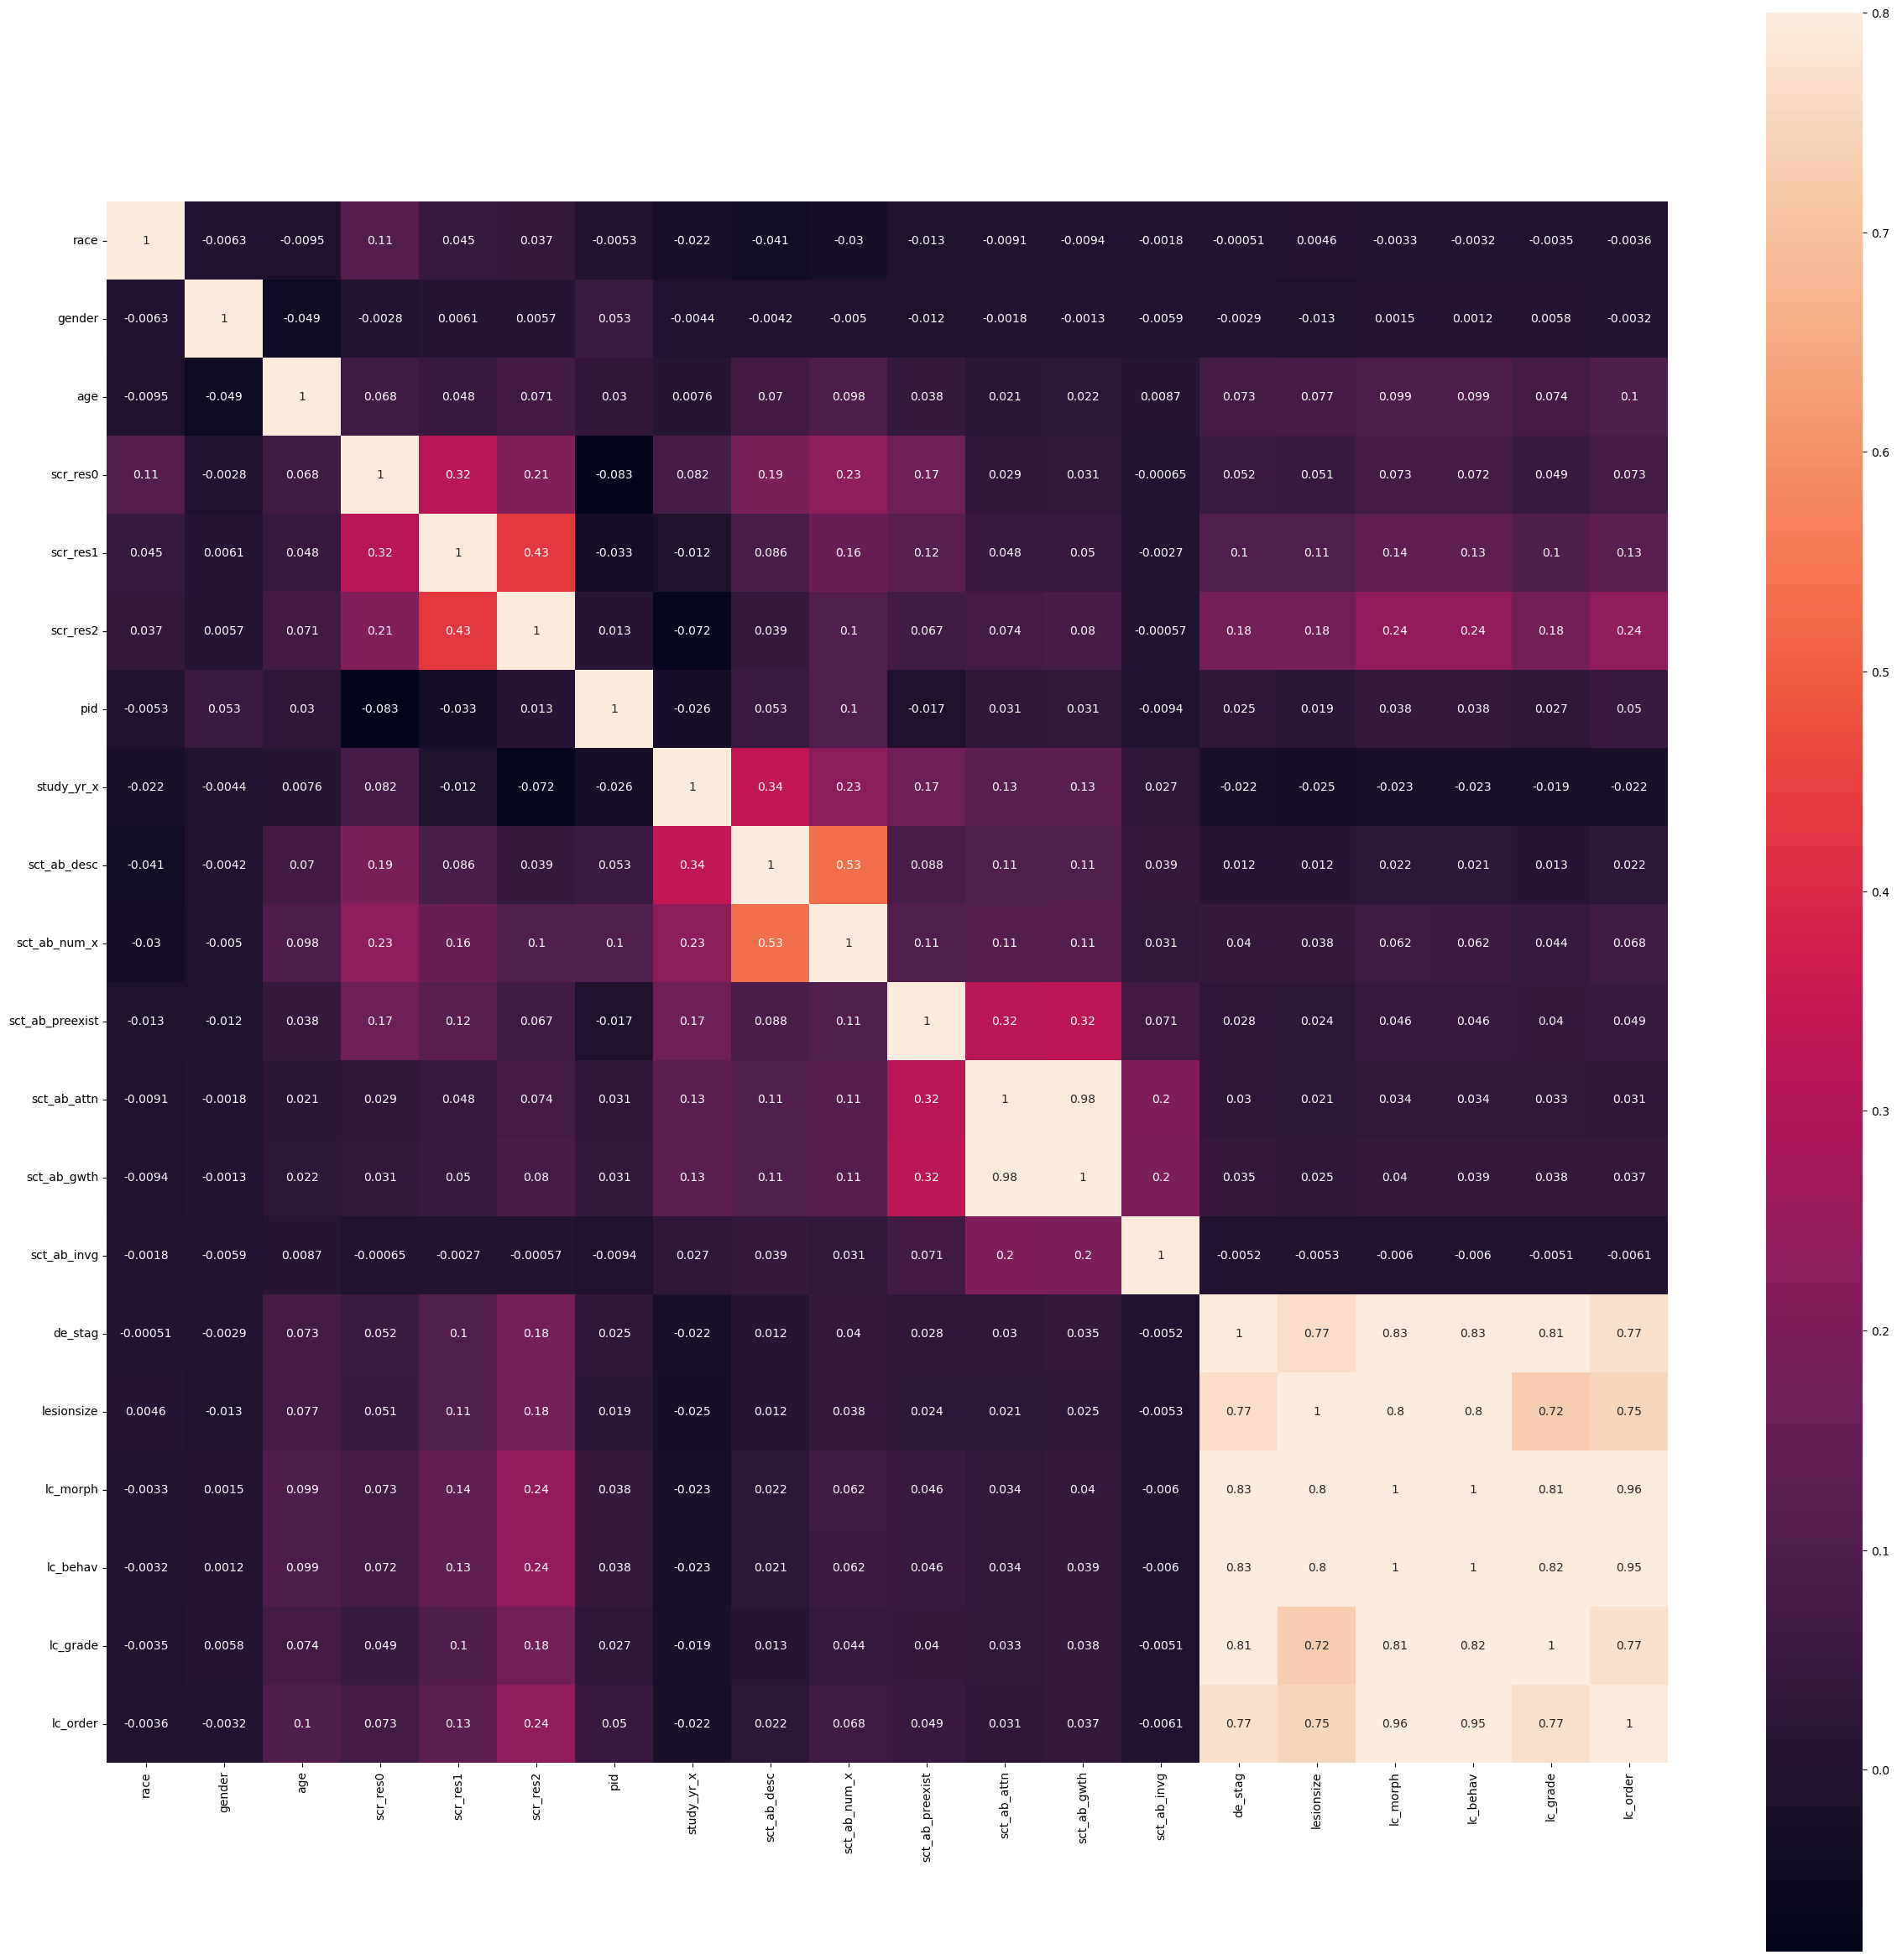